In [27]:
import numpy as np
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_state_city as plt
from qiskit.visualization import plot_histogram as plthist
%matplotlib inline

In [28]:
theta = np.pi/3
vqe = QuantumCircuit(2)
vqe.ry(2*theta,0)
vqe.ry(2*theta,1)
vqe.h(1)

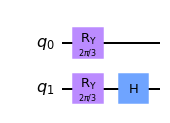

In [29]:
vqe.draw('mpl')

In [30]:
backend = Aer.get_backend('statevector_simulator')

In [31]:
job = execute(vqe,backend)

In [32]:
result = job.result()

[ 0.48296291-3.74969972e-17j  0.8365163 -6.49467042e-17j
 -0.12940952+3.74969972e-17j -0.22414387+6.49467042e-17j]


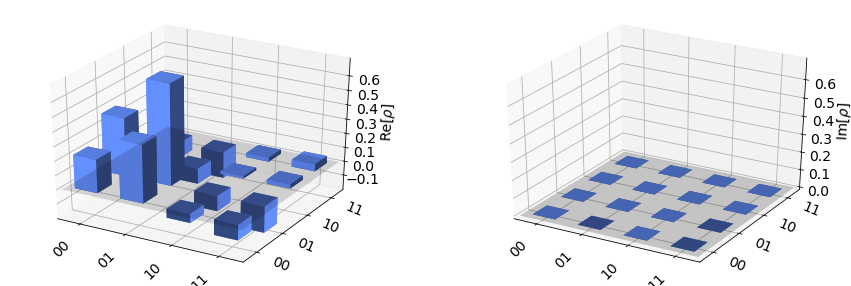

In [33]:
output = result.get_statevector(vqe,decimals = 3)
print(output)
plt(output)

In [34]:
backend = Aer.get_backend('unitary_simulator')
job = execute(vqe,backend)
result = job.result()
print(result.get_unitary(vqe, decimals = 3))

[[ 0.48296291-3.74969972e-17j -0.8365163 +6.49467042e-17j
  -0.12940952-2.16489014e-17j  0.22414387+3.74969972e-17j]
 [ 0.8365163 -6.49467042e-17j  0.48296291-3.74969972e-17j
  -0.22414387-3.74969972e-17j -0.12940952-2.16489014e-17j]
 [-0.12940952+3.74969972e-17j  0.22414387-6.49467042e-17j
  -0.48296291+2.16489014e-17j  0.8365163 -3.74969972e-17j]
 [-0.22414387+6.49467042e-17j -0.12940952+3.74969972e-17j
  -0.8365163 +3.74969972e-17j -0.48296291+2.16489014e-17j]]


In [35]:
meas = QuantumCircuit(2,2)
meas.barrier(range(2))
meas.measure(range(2),range(2))

qc = vqe + meas
qc.draw()

┌──────────┐      ░ ┌─┐   
q_0: ┤ RY(2π/3) ├──────░─┤M├───
     ├──────────┤┌───┐ ░ └╥┘┌─┐
q_1: ┤ RY(2π/3) ├┤ H ├─░──╫─┤M├
     └──────────┘└───┘ ░  ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1

{'00': 247, '01': 707, '10': 16, '11': 54}


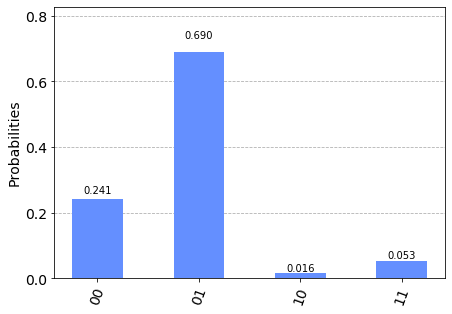

In [36]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim, shots = 1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

plthist(counts)

Expectation Value of Z

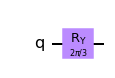

In [37]:
zave = QuantumCircuit(1)
zave.ry(2*theta,0)
zave.draw('mpl')

In [38]:
backend = Aer.get_backend('statevector_simulator')

In [39]:
job = execute(zave,backend)

In [40]:
result = job.result()

[0.5      +0.j 0.8660254+0.j]


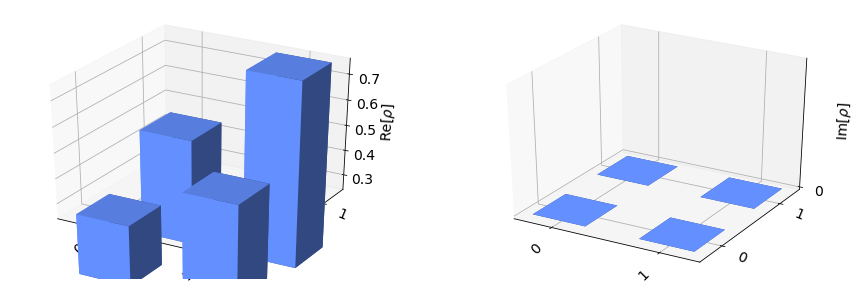

In [41]:
output = result.get_statevector(zave,decimals = 3)
print(output)
plt(output)

In [42]:
backend = Aer.get_backend('unitary_simulator')
job = execute(zave,backend)
result = job.result()
print(result.get_unitary(zave, decimals = 3))

[[ 0.5      +0.j -0.8660254+0.j]
 [ 0.8660254+0.j  0.5      +0.j]]


In [43]:
meas = QuantumCircuit(1,1)
meas.barrier(range(1))
meas.measure(range(1),range(1))

qc = zave + meas
qc.draw()

┌──────────┐ ░ ┌─┐
q_0: ┤ RY(2π/3) ├─░─┤M├
     └──────────┘ ░ └╥┘
c: 1/════════════════╩═
                     0

{'0': 1064, '1': 2960}


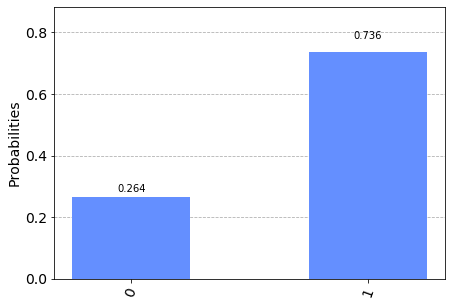

In [44]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim, shots = 4024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

plthist(counts)

Expectation Value of X

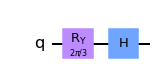

In [45]:
xave = QuantumCircuit(1)
xave.ry(2*theta,0)
xave.h(0)
xave.draw('mpl')

In [46]:
backend = Aer.get_backend('statevector_simulator')

In [47]:
job = execute(xave,backend)

In [48]:
result = job.result()

[ 0.96592583-7.49939943e-17j -0.25881905+7.49939943e-17j]


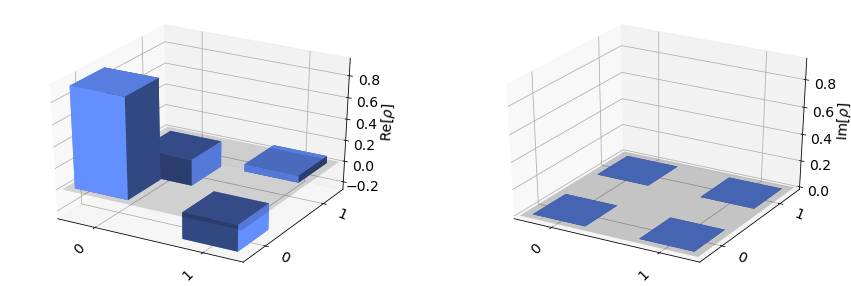

In [49]:
output = result.get_statevector(xave,decimals = 3)
print(output)
plt(output)

In [50]:
backend = Aer.get_backend('unitary_simulator')
job = execute(xave,backend)
result = job.result()
print(result.get_unitary(xave, decimals = 3))

[[ 0.96592583-7.49939943e-17j -0.25881905-4.32978028e-17j]
 [-0.25881905+7.49939943e-17j -0.96592583+4.32978028e-17j]]


In [51]:
meas = QuantumCircuit(1,1)
meas.barrier(range(1))
meas.measure(range(1),range(1))

qc = xave + meas
qc.draw()

┌──────────┐┌───┐ ░ ┌─┐
q_0: ┤ RY(2π/3) ├┤ H ├─░─┤M├
     └──────────┘└───┘ ░ └╥┘
c: 1/═════════════════════╩═
                          0

{'0': 3735, '1': 289}


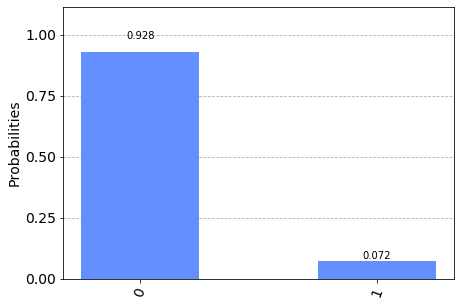

In [52]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim, shots = 4024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

plthist(counts)